In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')


(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')


input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN,Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 25s 149ms/step - loss: 0.6158 - acc: 0.6389 - val_loss: 0.4940 - val_acc: 0.7862
Epoch 2/10
157/157 [==============================] - 23s 147ms/step - loss: 0.4031 - acc: 0.8332 - val_loss: 0.3889 - val_acc: 0.8320
Epoch 3/10
157/157 [==============================] - 23s 145ms/step - loss: 0.3314 - acc: 0.8655 - val_loss: 0.3618 - val_acc: 0.8524
Epoch 4/10
157/157 [==============================] - 23s 144ms/step - loss: 0.2741 - acc: 0.8929 - val_loss: 0.3764 - val_acc: 0.8442
Epoch 5/10
157/157 [==============================] - 23s 146ms/step - loss: 0.2319 - acc: 0.9105 - val_loss: 0.3875 - val_acc: 0.8290
Epoch 6/10
157/157 [==============================] - 22s 143ms/step - loss: 0.1928 - acc: 0.9291 - val_loss: 0.4064 - val_acc: 0.8418
Epoch 7/10
157/157 [==============================] - 27s 169ms/step - loss: 0.1491 - acc: 0.9470 - val_loss: 0.5480 - val_acc: 0.7724
Epoch 8/10
157/157 [==============================] - 4

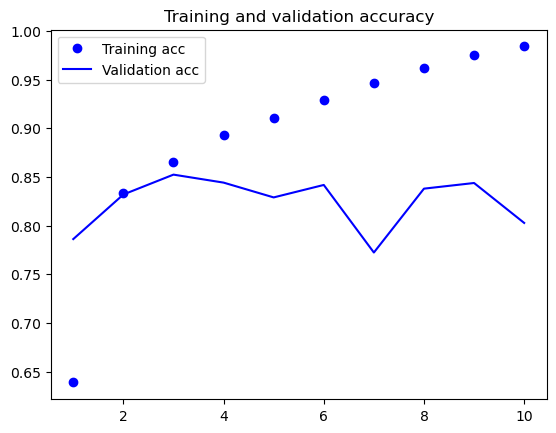

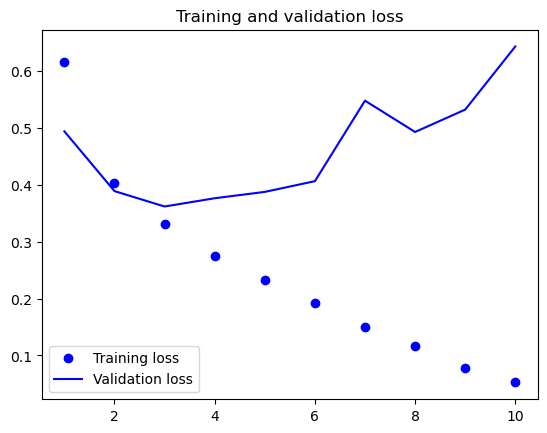

In [4]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
